# Sputtering Simulation

In [1]:
# Libraries for data
import numpy as np
import pandas as pd

# Libraries for graphs and animation
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle, PathPatch
from matplotlib.transforms import Affine2D
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.cm as cm
from tqdm.auto import tqdm

C:\Users\ANINDIT\AppData\Local\Temp\ipykernel_27564\2526101648.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\ANINDIT\anaconda3\envs\PYSRIM\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Visualization format
plt.rcParams.update({'mathtext.default':  'regular' })
sns.set(context='paper',style="whitegrid",font='Times New Roman',font_scale=1.2)

# Energy distribution
### Monte Carlo Method

In [3]:
# Number of points used
points = 100000

# Energy variable as a vector
energy = np.linspace(0,35,points)

# Evaluate the function of energy that has the distribution  
func_energy = 100*energy/(energy+4)**3

# Generate random variables ("a" and "b" corresponding to "energy" and "func_energy")
random_1,random_2 = np.random.uniform(0,max(energy),points), np.random.uniform(0,max(func_energy),points)

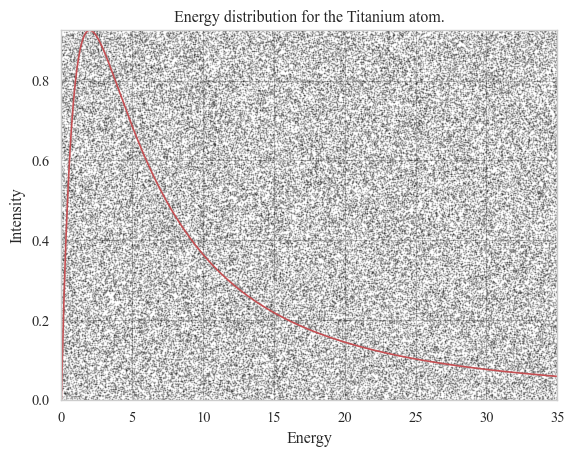

In [4]:
# Create a figure to plot
plt.figure()
plt.xlabel("Energy")
plt.ylabel("Intensity")
plt.title("Energy distribution for the Titanium atom.")
plt.ylim(min(func_energy),max(func_energy))
plt.xlim(min(energy),max(energy))


# Graph of the points 
plt.scatter(random_1,random_2,s=.01, c='k')
plt.plot(energy,func_energy, c='r')
plt.show()

In [5]:
# Histogram Bars
bins = 100
lenght = np.max(energy)/bins

# Bars creation
bars = np.arange(0,35,lenght)+lenght

# Histogram Initialization
histogram = np.zeros(len(bars))

# Histogram generated with the montecarlo conditons
for position in range(len(random_1)):
    flag = False
    if random_2[position]<=100*random_1[position]/(random_1[position]+4)**3:
        flag = True
    for i in range(bins):
        if i == 0:
            if random_1[position] < bars[i] and flag == True:
                histogram[0] += 1
                break
        else:
            if random_1[position] > bars[i-1] and random_1[position] < bars[i] and flag == True:
                histogram[i] += 1
                break

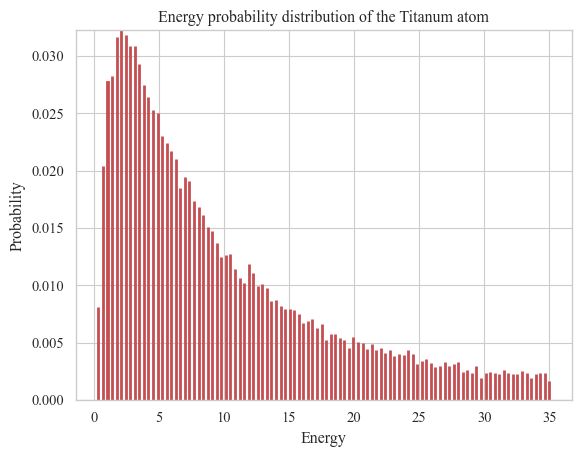

In [6]:
# Histogram plotting
plt.figure()
histogram_prob = histogram/histogram.sum()
plt.bar(bars, histogram_prob, width = 0.001, linewidth = 2, edgecolor='r')
plt.ylim(0,max(histogram_prob))

plt.xlabel("Energy")
plt.ylabel("Probability")
plt.title("Energy probability distribution of the Titanum atom")
plt.show()

In [7]:
def monte_carlo_sputter_yield(mass_ion, mass_target, ion_energy, surface_binding_energy, n_particles, angle_range, n=1.5):
    """
    Perform a Monte Carlo simulation to calculate the sputter yield for a given number of particles and range of angles.

    Parameters:
    mass_ion (float): mass of the ion in atomic mass units
    mass_target (float): mass of the target atom in atomic mass units
    ion_energy (float): energy of the ion in eV
    surface_binding_energy (float): surface binding energy of the target atom in eV
    n_particles (int): number of particles to simulate
    angle_range (tuple): range of angles to simulate in radians (min, max)
    n (float): exponent in the sputter yield formula (default: 1.5)

    Returns:
    sputter_yield (float): the sputter yield
    """

    # Generate random angles within the given range
    angles = np.random.uniform(angle_range[0], angle_range[1], n_particles)

    # Calculate the sputter yield for each particle
    sputter_yield = (4 / np.pi) * (mass_ion / mass_target) * (ion_energy / surface_binding_energy) * np.sin(angles)**n * np.exp(-2 / n * (surface_binding_energy / ion_energy) * (mass_ion / mass_target)**0.5 * np.cos(angles))

    # Return the mean sputter yield
    return np.mean(sputter_yield)

# Example usage
# mass_ion = 1.0  # mass of the ion in atomic mass units
# mass_target = 1.0  # mass of the target atom in atomic mass units
# ion_energy = 1000.0  # energy of the ion in eV
# surface_binding_energy = 10.0  # surface binding energy of the target atom in eV
# n_particles = 10000  # number of particles to simulate
# angle_range = (np.radians(30), np.radians(60))  # range of angles to simulate in radians

# sputter_yield = monte_carlo_sputter_yield(mass_ion, mass_target, ion_energy, surface_binding_energy, n_particles, angle_range)
# print("The sputter yield is:", sputter_yield)

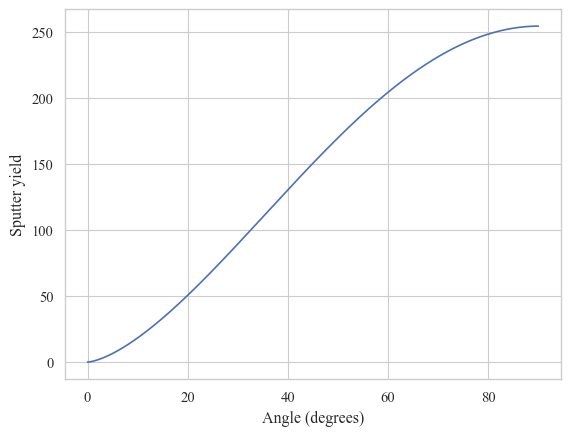

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def sputter_yield_graph(mass_ion, mass_target, ion_energy, surface_binding_energy, angle_range, n=1.5):
    angles = np.linspace(angle_range[0], angle_range[1], 1000)  # create 100000 angles between angle_range[0] and angle_range[1]
    sputter_yield = np.zeros_like(angles)
    for i, angle in enumerate(angles):
        sputter_yield[i] = (4 / np.pi) * (mass_ion / mass_target) * (ion_energy / surface_binding_energy) * np.sin(angle)**n * np.exp(-2 / n * (surface_binding_energy / ion_energy) * (mass_ion / mass_target)**0.5 * np.cos(angle))
    return sputter_yield

mass_ion = 1.0  # mass of the ion in atomic mass units
mass_target = 1.0  # mass of the target atom in atomic mass units
ion_energy = 1000.0  # energy of the ion in eV
surface_binding_energy = 5.0  # surface binding energy of the target atom in eV
angle_range = (np.radians(0), np.radians(90))  # range of angles to simulate in radians

sputter_yield = sputter_yield_graph(mass_ion, mass_target, ion_energy, surface_binding_energy, angle_range)

angles = np.linspace(np.radians(0), np.radians(90),1000)

plt.plot(np.degrees(angles), sputter_yield)
plt.xlabel('Angle (degrees)')
plt.ylabel('Sputter yield')
plt.show()

#### Yield (With probability determines the number of atoms that will be obtained from the sputter proccess considering the Argon Ions)

In [9]:
# Number of Argon Ions
Ar = 1000
energyAr = 10 #ev

angle_range = (np.radians(30), np.radians(90))
# Yield value
# for a specific case, maintain an unitary yield value
Ti_ = round(monte_carlo_sputter_yield(39.94, 47.86, energyAr, 0.0129, Ar, angle_range))
# Number of used titanium particles are the argon particles times the yield
print(Ti_)

628


# Eroded atom
###  Determine the primary characteristics of a particle to generate some properties: speed, angle and initial position. 

In [10]:
# Function to generate a particle with an allowed speed and an angle, with initial condition
def create_particle(bars,histogram,lenght,target_min,target_max):
    # To select the value of speed from the histogram
    
    # Boltzmann Constant
    k=1.380648813*10**(-23)
    # Temperature
    t=300
    #Energy of particles
    energyAr=3/2*k*t/(1.6*10**(-19))
    velocity = np.random.choice(bars, p=histogram)*energyAr
    
    # Giving a specific value of the velocity with a uniform distribution
    particle_v = np.random.uniform(low=(velocity-lenght),high=velocity)
    
    #Giving a specific value for the angle from 0 to pi
    particle_a = np.random.uniform(0, np.pi)
    angle = np.random.uniform(0,2*np.pi)
    
    #Defining the initial position of the value which got off from the target
    posx = np.random.uniform(target_min,target_max)
    posy = 0
    posz = np.random.uniform(target_min,target_max)
    
    # Save the three positions of the particle in a vector
    pos = [posx,posy,posz]
    
    # All the information of the particle can be saved in a list
    particle = [particle_v,particle_a,pos, angle]
    return particle

In [11]:
Ti = 100_000
test = []

# target
target_min = 3
target_max = 5

# Sustrate
sustrate_min = -5
sustrate_max = 5

#Creation of particles

particlesTi = [create_particle(bars,histogram_prob,
                               lenght,target_min, target_max)
               for i in range(Ti)]

v_ = np.array([particlesTi[i][0] for i in range(Ti)])[:,None]
a_ = np.array([particlesTi[i][1] for i in range(Ti)])[:,None]
pos_ = np.array([particlesTi[i][2] for i in range(Ti)])
angle_ = np.array([particlesTi[i][3] for i in range(Ti)])[:,None]

countgood = 0
countbad = 0

#Dimensions of the camera
camxmin = -11
camxmax = 11

camzmin = -11
camzmax = 11

camymin = 0
camymax = 20

# Save Results 
results_ = []
results_c = []
good_values = []


vectorpos = []
vectorpos.append(pos_) #Trajectory append

operations = True



"""THIS IS THE MIDDLE PATH OF PARTICLES BUT WE ARE NOT TAKING THE REAL ONE YET"""
recorrido = .1

#Threshold value for collision
tresh = 1/np.exp(1)

for i in tqdm(range(0,10000, 1)):
    # Determine if the particle collides depending on a "tresh" threshold value
    collision = np.random.uniform(0,1,a_.shape[0])
    
    collisiontrue = collision<tresh

    # a ---> True b---> False: collisiontrue

    modification = 7*recorrido

    a = np.concatenate([(recorrido*np.cos(a_)*np.cos(angle_) + modification*np.sin(np.random.uniform(0,2*np.pi,a_.shape[0]))[:,None]),
                    (recorrido*np.sin(a_) + modification*np.sin(np.random.uniform(0,2*np.pi,a_.shape[0]))[:,None]),
                    (recorrido*np.cos(a_)*np.cos(angle_) + modification*np.sin(np.random.uniform(0,2*np.pi,a_.shape[0]))[:,None])],axis = 1)

    b = np.concatenate([recorrido*np.cos(a_)*np.cos(angle_),
         recorrido*np.sin(a_),
         recorrido*np.sin(a_)*np.sin(angle_)],axis=1)
    
     
    pos_ = pos_ + a*collisiontrue[:,None] + b*(~collisiontrue)[:,None]

    op1 = np.abs(pos_[:,0]) > camxmax
    op2 = np.abs(pos_[:,-1]) > camzmax
    op3 = pos_[:,1] < camymin
    op4 = pos_[:,1] >= camymax

    
    op5 = (pos_[:,1] >= camymax)*(np.abs(pos_[:,0])<=sustrate_max)*(np.abs(pos_[:,-1])<=sustrate_max) #Colour; objective
    op = ~(op1+op2+op3+op4+op5)
    vectorpos.append(pos_)
    
    removed  = set(np.where(~op)[0].tolist())
    accepted = set(np.where(op)[0].tolist()) - set(np.where(op5)[0].tolist())
    rejected = set(np.where(op)[0].tolist()) - set(np.where(~op5)[0].tolist())
    
    test.append(len(list(removed)))
    color = np.array(['r']*a_.shape[0])
    color_green = list(accepted) #Indices for which the color is green
    color[color_green] = 'g'
    countgood += len(color_green)
    color_red = list(rejected) #Indices for which the color is red
    countbad += len(color_red)
    good_values.append(countgood)
    
    results_.append(vectorpos)
    results_c.append(color)
    
    v_ = v_[op,:]
    a_ = a_[op,:]
    pos_ = pos_[op,:]
    angle_ = angle_[op,:]

    if (op == True).any():
        pass
    else:
        print("Complete")
        break

        

counttotal=countgood+countbad
print("countgood",countgood)
print("Count Total",counttotal)
total_particles_sub_hit=countgood/counttotal
print(f"percentage incident on substrate: {total_particles_sub_hit*100}%")

 13%|█▎        | 1289/10000 [00:10<01:12, 120.02it/s] 

Complete
countgood 6379077
Count Total 6379077
percentage incident on substrate: 100.0%


## MONTE CARLO for sputtered particle interactions

In [12]:
Ti = 1000
test = []
# target
target_min = 3
target_max = 5

# Sustrate
sustrate_min = -5
sustrate_max = 5

#Creation of particles
particlesTi = [create_particle(bars,histogram_prob,
                               lenght,target_min, target_max)
               for i in range(Ti)]
countgood = 0
countbad = 0

#Dimensions of the camera
camxmin = -11
camxmax = 11

camzmin = -11
camzmax = 11

camymin = 0
camymax = 20

# Save Results 
results_x = []
results_y = []
results_z = []
results_c = []
good_values = []
c = 0
for particle in tqdm(particlesTi):
    objective=False
    #Define position vectors
    vectorposx = []
    vectorposy = []
    vectorposz = []

    posx = particle[2][0]
    posy = particle[2][1]
    posz = particle[2][2]

    vectorposx.append(posx)
    vectorposy.append(posy)
    vectorposz.append(posz)
    operations = True


    """THIS IS THE MIDDLE PATH OF PARTICLES BUT WE ARE NOT TAKING THE REAL ONE YET"""
    #impact parameter
    recorrido = .1

    #Threshold value for collision
    tresh = 1/np.exp(1)

    
    while operations==True:
        # Determine if the particle collides depending on a "tresh" threshold value
        collision = np.random.uniform(0,1)

        if collision < tresh:
            collisiontrue = True
        else: 
            collisiontrue = False

        # Determine the mechanics of the particle when it does not collide
        if collisiontrue == False:
            posx = posx + recorrido*np.cos(particle[1])*np.cos(particle[3])
            posy = posy + recorrido*np.sin(particle[1])
            posz = posz + recorrido*np.sin(particle[1])*np.sin(particle[3])
            pos = [posx,posy,posz]

        # Determine the mechanics of the particle when it collides
        elif collisiontrue == True:
            
            modification = 7*recorrido
            modificacion = 7*recorrido
            #particle[1]=particle[1]+.7*np.random.uniform(0,2*np.pi)

            posx = posx + recorrido*np.cos(particle[1])*np.cos(particle[3]) + modificacion*np.sin(np.random.uniform(0,2*np.pi))
            posy = posy + recorrido*np.sin(particle[1]) + modificacion*np.sin(np.random.uniform(0,2*np.pi))
            posz = posz + recorrido*np.sin(particle[1])*np.sin(particle[3]) + modificacion*np.sin(np.random.uniform(0,2*np.pi))
            pos = [posx,posy,posz]
            
        #Evaluate if the particle is still in the box
        if abs(posx) > camxmax:
            operations = False
        elif abs(posz) > camzmax:
            operations = False
        elif posy < camymin:
            operations = False
        elif (posy >= camymax) and (abs(posx) >= sustrate_max) and (abs(posz) >= sustrate_max):
            operations = False
        elif (posy >= camymax) and (abs(posx) >= sustrate_max) and (abs(posz) <= sustrate_max):
            operations = False    
        elif (posy >= camymax) and (abs(posx) <= sustrate_max) and (abs(posz) >= sustrate_max):
            operations = False  
        elif (posy >= camymax) and (abs(posx) <= sustrate_max) and (abs(posz) <= sustrate_max):
            operations = False
            objective=True
        if operations == True:
            c = c+1
        vectorposx.append(posx)
        vectorposy.append(posy)
        vectorposz.append(posz)
        
        particle[2]=pos
    test.append(c)
    if objective == True:
        color = 'g'
        #reaching substrate
        countgood += 1
        #plt.axes(projection='3d').plot(vectorposx, vectorposz, vectorposy)
    elif objective == False:
        #not reaching substrate
        countbad += 1
        color = 'r'
    good_values.append(countgood)
    #plt.plot(vectorposx,vectorposy,c=color,linewidth=.1)

    # Result vectors
    results_x.append(vectorposx)
    results_y.append(vectorposy)
    results_z.append(vectorposz)
    results_c.append(color)

#total count
counttotal=countgood+countbad
print("countgood",countgood)
print("Count Total",counttotal)
total_particles_sub_hit=countgood/counttotal
print(f"percentage incident on substrate: {total_particles_sub_hit*100}%")

100%|██████████| 1000/1000 [00:01<00:00, 668.65it/s]

countgood 18
Count Total 1000
percentage incident on substrate: 1.7999999999999998%


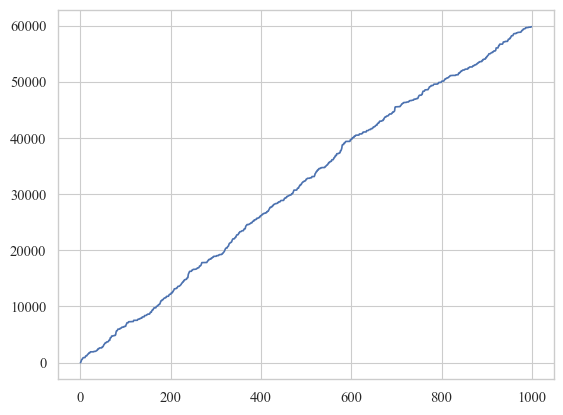

In [13]:
plt.plot(test)

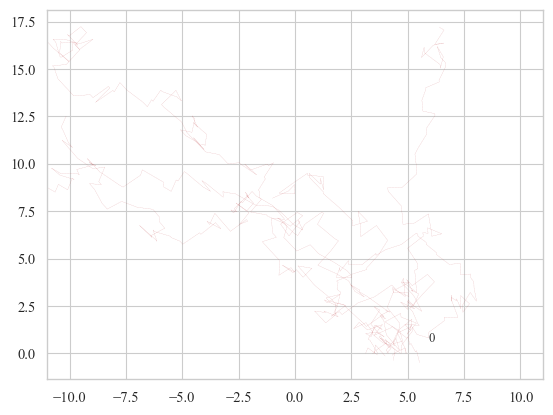

In [14]:
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlim(camxmin,camxmax)
#plt.ylim(camymin,camymax)
text = plt.text(5.9,.58,f' 0', fontsize=9)
#plotter = ax1.plot(results_x[0][:-3],results_y[0][:-3], c='k')


#def a2(i):
#    plotter.set_data(results_x[0][0:i], results_y[0][0:i])


mult = int(Ti/100)
def ani(i):
    global mult,Ti
   # How many plot lines at the same time would you like to plot
    text.set_text(f'{i}')
    for j in range(mult):
        plot = ax.plot(results_x[mult*i+j],
                      results_y[mult*i+j],
                      color = results_c[mult*i+j],
                      linewidth=.1, ls='--')

anim = animation.FuncAnimation(fig, ani, frames=int(Ti/mult), repeat=False)

MovieWriter imagemagick unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


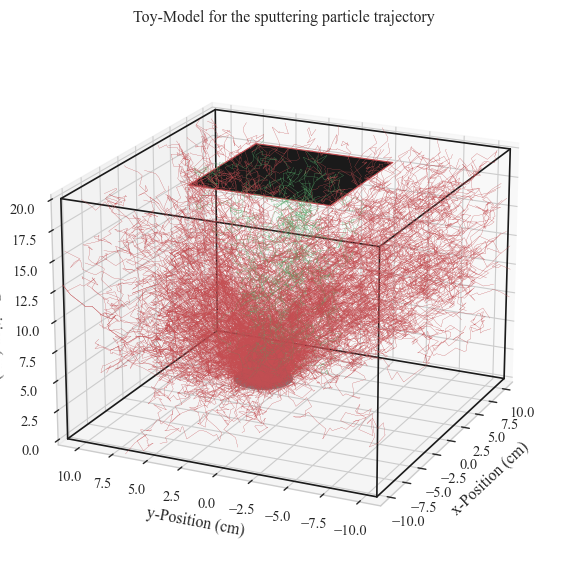

In [15]:
fig3d  = plt.figure(figsize=(7,7))
ax3d = fig3d.add_subplot(111, projection='3d')
plot = ax3d.plot([], [], [])

#Draw the box
ax3d.plot([camxmin,camxmax],[camzmin,camzmin],[camymin,camymin], c='k', zorder=1)
ax3d.plot([camxmin,camxmax],[camzmax,camzmax],[camymin,camymin], c='k', zorder=1)
ax3d.plot([camxmin,camxmin],[camzmin,camzmax],[camymin,camymin], c='k', zorder=1)
ax3d.plot([camxmax,camxmax],[camzmin,camzmax],[camymin,camymin], c='k', zorder=1)
ax3d.plot([camxmin,camxmax],[camzmin,camzmin],[camymax,camymax], c='k', zorder=1)
ax3d.plot([camxmin,camxmax],[camzmax,camzmax],[camymax,camymax], c='k', zorder=1)
ax3d.plot([camxmin,camxmin],[camzmin,camzmax],[camymax,camymax], c='k', zorder=1)
ax3d.plot([camxmax,camxmax],[camzmin,camzmax],[camymax,camymax], c='k', zorder=1)
ax3d.plot([camxmin,camxmin],[camzmin,camzmin],[camymin,camymax], c='k', zorder=1)
ax3d.plot([camxmax,camxmax],[camzmin,camzmin],[camymin,camymax], c='k', zorder=1)
ax3d.plot([camxmin,camxmin],[camzmax,camzmax],[camymin,camymax], c='k', zorder=1)
ax3d.plot([camxmax,camxmax],[camzmax,camzmax],[camymin,camymax], c='k', zorder=1)

# Set the box limits
ax3d.set_ylim(camzmax,camzmin,)
ax3d.set_zlim(camymin,camymax)
ax3d.set_xlim(camxmax,camxmin)


# Draw the tarjet
target_circle = Circle((4, 4), 2, color='Gray')
target_circle.set_zorder(0)
ax3d.add_patch(target_circle)
art3d.pathpatch_2d_to_3d(target_circle, z=camymin, zdir="z")

#Draw the sustrate
x = [-1*sustrate_max,sustrate_max,sustrate_max,-1*sustrate_max]
y = [-1*sustrate_max,-1*sustrate_max,sustrate_max,sustrate_max]
z = [camymax,camymax,camymax,camymax]
verts = [list(zip(x,y,z))]
rectangle = Poly3DCollection(verts)
rectangle.set_color('r')
rectangle.set_facecolor('k')
rectangle.set_alpha(1)
rectangle.set_zorder(10)
ax3d.add_collection3d(rectangle)
ax3d.view_init(20,25)

def ani3d(i):
    global mult,Ti
   # How many plot lines at the same time would you like to plot
    for j in range(mult):
        plot = ax3d.plot(results_x[mult*i+j],
                      results_z[mult*i+j],
                      results_y[mult*i+j],
                      color = results_c[mult*i+j],
                      linewidth=.1, zorder=3)
    ax3d.view_init(20,25+i*360/(int(Ti/mult)))
    
plt.title('Toy-Model for the sputtering particle trajectory')
ax3d.set_xlabel('x-Position (cm)')
ax3d.set_ylabel('y-Position (cm)')
ax3d.set_zlabel('z-Position (cm)')
anim3d = animation.FuncAnimation(fig3d, ani3d, frames=int(Ti/mult), repeat=False)
anim3d.save('interference_pattern.gif', writer='imagemagick')
anim3d.save('sputtering_simulation.gif', writer='ffmpeg')

# markov chain metropolis

In [16]:
#1D model

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Parameters
num_steps = 10000  # Number of MCMC steps
box_size = 20.0  # Size of the box
sigma = 0.5  # Standard deviation of the proposal distribution
n_particles = 10  # Number of particles
mass = 1.0  # Mass of each particle
k = 1.0  # Spring constant

# Function to calculate the kinetic energy
def kinetic_energy(velocities):
    return np.sum(velocities**2) / (2 * mass)

# Function to calculate the potential energy
def potential_energy(positions):
    v = 0
    for i in range(n_particles):
        for j in range(i+1, n_particles):
            x = positions[i] - positions[j]
            if np.abs(x) > box_size / 2:
                x = x - np.sign(x) * box_size
            v += k / 2 * x**2
    return v

# Function to propose a new state
def propose_state(positions, velocities):
    # Propose new positions
    positions_new = positions + np.random.normal(scale=sigma, size=n_particles)
    # Wrap around the positions if they are outside the box
    positions_new = (positions_new + box_size) % box_size - box_size / 2
    # Propose new velocities
    velocities_new = velocities + np.random.normal(scale=sigma, size=n_particles)
    return positions_new, velocities_new

# Function to perform a Metropolis-Hastings step
def metropolis_hastings_step(positions, velocities):
    # Propose a new state
    positions_new, velocities_new = propose_state(positions, velocities)
    # Calculate the Hamiltonian for the current and proposed states
    hamiltonian_old = kinetic_energy(velocities) + potential_energy(positions)
    hamiltonian_new = kinetic_energy(velocities_new) + potential_energy(positions_new)
    # Accept or reject the new state
    if hamiltonian_new < hamiltonian_old:
        # If the new Hamiltonian is lower, always accept
        return positions_new, velocities_new
    else:
        # If the new Hamiltonian is higher, accept with a certain probability
        accept_probability = np.exp(hamiltonian_old - hamiltonian_new)
        if np.random.rand() < accept_probability:
            return positions_new, velocities_new
        else:
            return positions, velocities

# Initialize the initial positions and velocities
positions_init = np.random.uniform(low=-box_size/2, high=box_size/2, size=n_particles)
velocities_init = np.zeros(n_particles)

# Initialize the positions and velocities after evolution
positions_evolved = np.zeros_like(positions_init)
velocities_evolved = np.zeros_like(velocities_init)

# Evolve the system
for step in tqdm(range(num_steps)):
    positions, velocities = metropolis_hastings_step(positions, velocities)
    if step == num_steps - 1:
        positions_evolved = positions
        velocities_evolved = velocities

# Plot the positions of the particles before and after evolution
plt.scatter(positions_init, np.zeros_like(positions_init), s=10, label="Before evolution")
plt.scatter(positions_evolved, np.zeros_like(positions_evolved), s=10, label="After evolution")
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.legend()
plt.show()

# Print the mean position and velocity before and after evolution
print("Mean position before evolution:", np.mean(positions_init))
print("Mean velocity before evolution:", np.mean(velocities_init))
print("Mean position after evolution:", np.mean(positions_evolved))
print("Mean velocity after evolution:", np.mean(velocities_evolved))

  0%|          | 0/10000 [00:00<?, ?it/s]


NameError: name 'positions' is not defined

100%|██████████| 10000/10000 [00:07<00:00, 1255.86it/s]


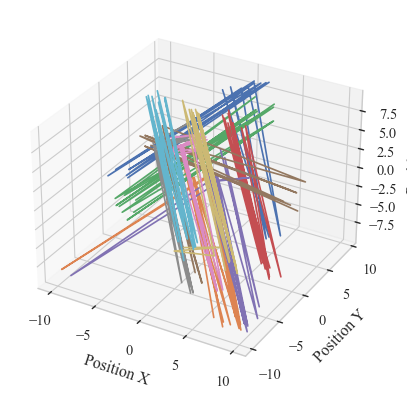

Mean position: [[-1.19622568  6.90303865  6.90778944]
 [ 6.1955474  -6.81821326 -6.78013725]
 [-5.02497203 -1.87783061  0.11168792]
 [ 0.81976923  5.76144329  1.40580938]
 [ 1.38964159  2.16003767 -0.70677194]
 [ 3.80022267 -7.74477731 -1.68479504]
 [-3.20230065  4.36424334 -1.18125285]
 [-5.94172273  2.57503415 -0.59749472]
 [ 0.29698042 -0.37539593  6.45131142]
 [-0.60261344 -3.0106357  -3.15821341]]
Mean velocity: [[ 8.19711791e-01 -2.89467588e+00 -3.18163012e+00]
 [ 3.88182748e-01  1.27205607e+00 -4.33792805e-01]
 [ 3.26957713e+00  1.64434419e+00  3.23354707e+00]
 [ 2.99205899e+00 -2.25386740e+00  1.47441716e+00]
 [-2.81811903e+00  2.24643038e+00 -1.80936521e+00]
 [ 2.14818974e+00 -4.09474100e-01 -1.40265816e+00]
 [-1.07815141e-01 -2.61970127e+00  6.78724563e-01]
 [-5.42843611e+00 -1.95840109e+00  2.19085463e+00]
 [ 2.98401766e+00  7.34086814e-01  2.33890313e-03]
 [ 1.70110004e-01 -2.74482974e-01  1.86810285e+00]]


In [ ]:
#3d model
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

# Parameters
num_steps = 10000  # Number of MCMC steps
box_size = 20.0  # Size of the box
sigma = 0.5  # Standard deviation of the proposal distribution
n_particles = 10  # Number of particles
mass = 1.0  # Mass of each particle
k = 1.0  # Spring constant

# Function to calculate the kinetic energy
def kinetic_energy(velocities):
    return np.sum(velocities**2) / (2 * mass)

# Function to calculate the potential energy
def potential_energy(positions):
    v = 0
    for i in range(n_particles):
        for j in range(i+1, n_particles):
            x = positions[i] - positions[j]
            if np.linalg.norm(x) > box_size / 2:
                x = x - np.sign(x) * box_size
            v += k / 2 * np.linalg.norm(x)**2
    return v

# Function to propose a new state
def propose_state(positions, velocities):
    # Propose new positions
    positions_new = positions + np.random.normal(scale=sigma, size=(n_particles, 3))
    # Wrap around the positions if they are outside the box
    positions_new = (positions_new + box_size) % box_size - box_size / 2
    # Propose new velocities
    velocities_new = velocities + np.random.normal(scale=sigma, size=(n_particles, 3))
    return positions_new, velocities_new

# Function to perform a Metropolis-Hastings step
def metropolis_hastings_step(positions, velocities):
    # Propose a new state
    positions_new, velocities_new = propose_state(positions, velocities)
    # Calculate the Hamiltonian for the current and proposed states
    hamiltonian_old = kinetic_energy(velocities) + potential_energy(positions)
    hamiltonian_new = kinetic_energy(velocities_new) + potential_energy(positions_new)
    # Accept or reject the new state
    if hamiltonian_new < hamiltonian_old:
        # If the new Hamiltonian is lower, always accept
        return positions_new, velocities_new
    else:
        # If the new Hamiltonian is higher, accept with a certain probability
        accept_probability = np.exp(hamiltonian_old - hamiltonian_new)
        if np.random.rand() < accept_probability:
            return positions_new, velocities_new
        else:
            return positions, velocities

# Initialize the positions and velocities
positions = np.random.uniform(low=-box_size/2, high=box_size/2, size=(n_particles, 3))
velocities = np.zeros((n_particles, 3))

# Main MCMC loop
states = np.zeros((num_steps, n_particles, 3, 2))
for step in tqdm(range(num_steps)):
    positions, velocities = metropolis_hastings_step(positions, velocities)
    states[step, :, :, 0] = positions
    states[step, :, :, 1] = velocities

# Plot the positions of the particles
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(n_particles):
    ax.plot(states[:, i, 0, 0], states[:, i, 1, 0], states[:, i, 2, 0])
ax.set_xlabel('Position X')
ax.set_ylabel('Position Y')
ax.set_zlabel('Position Z')
plt.show()

# Print the mean position and velocity
print("Mean position:", np.mean(states[:, :, :, 0], axis=0))
print("Mean velocity:", np.mean(states[:, :, :, 1], axis=0))

# Models